In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_excel('nba_player_data.xlsx',engine='openpyxl')
pd.set_option('display.max_columns',None)
df

NameError: name 'pd' is not defined

In [3]:
df['season_start_year'] = df['Year'].str[:4].astype(int)
df.drop(columns=['EFF','RANK'],inplace = True)
df['TEAM'].replace(['NOH','NOP'],value = 'NO', inplace = True)
df['Season_type'].replace('Regular%20Season',value = 'RS',inplace= True)
rs_df = df[df['Season_type'] == 'RS']
playoff_df = df[df['Season_type']=='Playoffs']

NameError: name 'df' is not defined

In [4]:
total_cols = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA',
              'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS']

In [4]:
data_per_min = df.groupby(['PLAYER','PLAYER_ID','Year'])[total_cols].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col]/data_per_min['MIN']
data_per_min['FG%'] = data_per_min['FGM']/data_per_min['FGA']
data_per_min['3PT%'] = data_per_min['FG3M']/data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM']/data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A']/data_per_min['FGA']
data_per_min['PTS/FGA'] = data_per_min['PTS']/data_per_min['FGA']
data_per_min['FG3M/FGM'] = data_per_min['FG3M']/data_per_min['FGM']
data_per_min['FTA/FGA'] = data_per_min['FTA']/data_per_min['FGA']
data_per_min['TRU%'] = 0.5*data_per_min['PTS']/(data_per_min['FGA']+0.475*data_per_min['FTA'])
data_per_min['AST_TOV'] = data_per_min['AST']/data_per_min['TOV']


In [7]:
data_per_min

,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,163,0.104294,0.257669,0.030675,0.061350,0.055215,0.122699,0.049080,0.171779,0.220859,0.024540,0.006135,0.079755,0.061350,0.128834,0.294479,0.404762,0.500000,0.450000,0.238095,1.142857,0.294118,0.476190,0.466019,0.400000
1,1278,0.125978,0.323161,0.054773,0.156495,0.038341,0.048513,0.015649,0.073552,0.089202,0.160407,0.025822,0.002347,0.050078,0.057121,0.345070,0.389831,0.350000,0.790323,0.484262,1.067797,0.434783,0.150121,0.498361,3.203125
2,99,0.191919,0.464646,0.060606,0.222222,0.000000,0.020202,0.010101,0.090909,0.101010,0.131313,0.010101,0.000000,0.070707,0.050505,0.444444,0.413043,0.272727,0.000000,0.478261,0.956522,0.315789,0.043478,0.468584,1.857143
3,324,0.157407,0.422840,0.046296,0.175926,0.049383,0.074074,0.018519,0.080247,0.098765,0.141975,0.021605,0.000000,0.043210,0.046296,0.410494,0.372263,0.263158,0.666667,0.416058,0.970803,0.294118,0.175182,0.448113,3.285714
4,1064,0.146617,0.328947,0.047932,0.134398,0.040414,0.053571,0.015038,0.068609,0.083647,0.117481,0.029135,0.010338,0.068609,0.091165,0.381579,0.445714,0.356643,0.754386,0.408571,1.160000,0.326923,0.162857,0.538354,1.712329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149,1514,0.141347,0.314399,0.057464,0.183620,0.036328,0.044914,0.019815,0.075958,0.095773,0.046235,0.026420,0.007926,0.028402,0.083884,0.376486,0.449580,0.312950,0.808824,0.584034,1.197479,0.406542,0.142857,0.560693,1.627907
5150,668,0.314371,0.538922,0.008982,0.020958,0.170659,0.266467,0.095808,0.128743,0.224551,0.074850,0.023952,0.013473,0.088323,0.062874,0.808383,0.583333,0.428571,0.640449,0.038889,1.500000,0.028571,0.494444,0.607356,0.847458
5151,2026,0.312932,0.511846,0.004936,0.016782,0.182132,0.261106,0.082428,0.135242,0.217670,0.111550,0.028134,0.019250,0.082428,0.066634,0.812932,0.611379,0.294118,0.697543,0.032787,1.588235,0.015773,0.510125,0.639227,1.353293
5152,75,0.146667,0.400000,0.040000,0.186667,0.040000,0.066667,0.066667,0.040000,0.106667,0.066667,0.026667,0.000000,0.066667,0.080000,0.373333,0.366667,0.214286,0.600000,0.466667,0.933333,0.272727,0.166667,0.432432,1.000000


In [5]:
data_per_min.columns

Index(['PLAYER', 'PLAYER_ID', 'Year', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A',
       'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3PT%', 'FT%', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA',
       'TRU%', 'AST_TOV'],
      dtype='object')

In [6]:
data_per_min = data_per_min[data_per_min['MIN'] >=50]
data_per_min.drop(columns=['PLAYER', 'PLAYER_ID', 'Year'],inplace = True)
data_per_min.corr()

,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
MIN,1.000000,0.433333,0.349036,0.178089,0.096533,0.341287,0.270328,-0.107239,0.043372,-0.016957,0.244129,0.068363,-0.052983,0.139789,-0.385106,0.459900,0.213041,0.168443,0.255956,-0.024285,0.269813,0.004088,0.019731,0.338836,0.081535
FGM,0.433333,1.000000,0.873006,0.180439,0.128051,0.606417,0.560888,0.083727,0.224036,0.183577,0.219162,-0.018783,0.074562,0.394146,-0.195538,0.956170,0.406107,0.116770,0.225496,-0.226480,0.344004,-0.214274,0.030657,0.422043,-0.095543
FGA,0.349036,0.873006,1.000000,0.409439,0.427795,0.549125,0.457985,-0.208121,-0.017605,-0.100131,0.329416,0.029896,-0.167451,0.419311,-0.322980,0.896883,-0.065531,0.169510,0.326590,0.049382,-0.029820,0.040825,-0.138717,0.045582,0.020900
FG3M,0.178089,0.180439,0.409439,1.000000,0.958148,-0.026343,-0.169342,-0.620638,-0.398729,-0.527283,0.159518,0.002777,-0.439309,-0.072549,-0.400384,0.348590,-0.368385,0.577978,0.403877,0.845528,-0.074920,0.868526,-0.399516,0.140892,0.234463
FG3A,0.096533,0.128051,0.427795,0.958148,1.000000,-0.040917,-0.181771,-0.654959,-0.426937,-0.560509,0.180099,0.030084,-0.466425,-0.049827,-0.395855,0.296345,-0.499887,0.465828,0.383952,0.886661,-0.217279,0.854612,-0.424219,-0.030552,0.250394
FTM,0.341287,0.606417,0.549125,-0.026343,-0.040917,1.000000,0.951315,0.101340,0.194898,0.171822,0.246573,0.040755,0.073147,0.454391,-0.085690,0.736594,0.205978,-0.004717,0.283721,-0.286759,0.490115,-0.282579,0.590675,0.287822,-0.099926
FTA,0.270328,0.560888,0.457985,-0.169342,-0.181771,0.951315,1.000000,0.252285,0.296213,0.302929,0.169153,0.041324,0.187604,0.457685,0.020942,0.656697,0.287117,-0.094310,0.029268,-0.410173,0.512555,-0.401815,0.708676,0.250926,-0.180862
OREB,-0.107239,0.083727,-0.208121,-0.620638,-0.654959,0.101340,0.252285,1.000000,0.681661,0.875480,-0.390062,-0.134719,0.618420,-0.008295,0.491974,-0.047077,0.560845,-0.414312,-0.375695,-0.663681,0.341204,-0.632058,0.397886,0.202090,-0.432835
DREB,0.043372,0.224036,-0.017605,-0.398729,-0.426937,0.194898,0.296213,0.681661,1.000000,0.950363,-0.246848,-0.132451,0.551969,0.105683,0.329409,0.133531,0.475532,-0.256467,-0.248103,-0.475308,0.331522,-0.458497,0.307806,0.239733,-0.356301
REB,-0.016957,0.183577,-0.100131,-0.527283,-0.560509,0.171822,0.302929,0.875480,0.950363,1.000000,-0.328914,-0.144771,0.627552,0.066274,0.426783,0.068175,0.552582,-0.343790,-0.323552,-0.596166,0.364063,-0.571615,0.372503,0.244279,-0.418839


(array([665., 321., 243., 236., 195., 169., 185., 179., 182., 196., 179.,
        208., 182., 182., 166., 185., 177., 162., 166., 186., 164., 136.,
        119., 105.,  87.,  70.,  44.,  35.,  19.,   5.]),
 array([1.00000000e+00, 1.06533333e+02, 2.12066667e+02, 3.17600000e+02,
        4.23133333e+02, 5.28666667e+02, 6.34200000e+02, 7.39733333e+02,
        8.45266667e+02, 9.50800000e+02, 1.05633333e+03, 1.16186667e+03,
        1.26740000e+03, 1.37293333e+03, 1.47846667e+03, 1.58400000e+03,
        1.68953333e+03, 1.79506667e+03, 1.90060000e+03, 2.00613333e+03,
        2.11166667e+03, 2.21720000e+03, 2.32273333e+03, 2.42826667e+03,
        2.53380000e+03, 2.63933333e+03, 2.74486667e+03, 2.85040000e+03,
        2.95593333e+03, 3.06146667e+03, 3.16700000e+03]),
 <BarContainer object of 30 artists>)

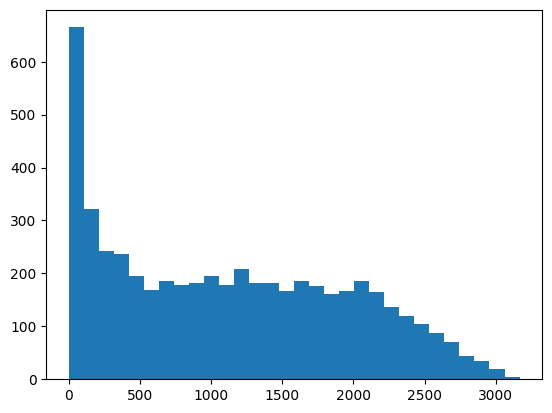

In [107]:
plt.hist(rs_df['MIN'],bins = 30)

In [84]:
change_df = df.groupby('season_start_year')[total_cols].sum().reset_index()
change_df['POSS_est'] = change_df['FGA'] - change_df['OREB'] + change_df['TOV'] + 0.44*change_df['FTA']
change_df = change_df[list(change_df.columns[0:2]) + ['POSS_est'] + list(change_df.columns[2:-1])]


change_df['FG%'] = change_df['FGM']/change_df['FGA']
change_df['3PT%'] = change_df['FG3M']/change_df['FG3A']
change_df['FT%'] = change_df['FTM']/change_df['FTA']
change_df['AST%'] = change_df['AST']/change_df['FGM']
change_df['FG3A%'] = change_df['FG3A']/change_df['FGA']
change_df['PTS/FGA'] = change_df['PTS']/change_df['FGA']
change_df['FG3M/FGM'] = change_df['FG3M']/change_df['FGM']
change_df['FTA/FGA'] = change_df['FTA']/change_df['FGA']
change_df['TRU%'] = 0.5*change_df['PTS']/(change_df['FGA']+0.475*change_df['FTA'])
change_df['AST_TOV'] = change_df['AST']/change_df['TOV']

change_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,635884,248201.92,97235,215105,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403,0.452035,0.357777,0.752755,0.593346,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,638373,254032.80,99251,218411,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201,0.454423,0.359601,0.756472,0.580921,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,634546,253004.12,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,636391,258064.80,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,632482,258443.80,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,633425,260904.52,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,634231,268739.84,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,552262,234384.64,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,562518,235759.48,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,635572,264004.96,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


In [98]:
change_per48_df = change_df.copy()

In [99]:
totals = change_per48_df.columns[2:18]

In [100]:
for col in totals:
    change_per48_df[col] = (change_per48_df[col]/change_per48_df['MIN'])*48*5

change_per48_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,635884,93.678188,36.699146,81.186506,7.098653,19.840977,16.653981,22.124035,11.034843,30.708242,41.743085,21.775292,7.690459,5.074133,13.791949,19.833051,97.150927,0.452035,0.357777,0.752755,0.593346,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,638373,95.505092,37.313984,82.112871,7.699574,21.411432,17.752255,23.467158,10.778275,31.509603,42.287879,21.676481,7.577764,4.650197,13.844946,20.617037,100.079797,0.454423,0.359601,0.756472,0.580921,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,634546,95.692020,37.160805,82.931103,7.838297,22.419557,17.057109,22.787190,10.804323,32.236339,43.040662,21.833689,7.663180,4.790196,13.538877,20.148705,99.217015,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,636391,97.323111,37.845036,83.851846,8.494400,24.012785,17.542423,23.200831,10.343075,33.040442,43.383517,21.968004,7.754478,4.919994,13.605975,20.167978,101.726894,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,632482,98.068423,38.760439,84.745368,9.641255,26.948308,17.760885,23.002710,10.044238,33.078443,43.122682,22.449461,7.643411,4.708687,13.246100,19.819821,104.923018,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,633425,98.854773,39.302143,85.448980,10.430911,28.888661,16.565560,21.599905,9.622734,33.599432,43.222165,23.013553,7.646430,4.787686,13.524569,19.792588,105.600758,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,634231,101.694117,40.631505,88.441088,11.283081,31.840639,17.660821,23.011553,10.265534,34.571631,44.837165,24.315557,7.545516,4.913289,13.393480,20.836446,110.206912,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,552262,101.858020,40.414296,87.881332,12.182044,34.018202,17.795467,22.991696,9.909210,34.469726,44.378936,24.095085,7.547722,4.817279,13.769551,20.692353,110.806103,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,562518,100.587493,40.894265,87.785564,12.607170,34.410846,16.905699,21.723892,9.778034,34.196666,43.974699,24.451911,7.462588,4.809233,13.021450,19.264237,111.301398,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,635572,99.691601,40.241798,87.339153,12.360393,34.948802,16.894388,21.791646,10.215176,33.834845,44.050021,24.400571,7.554518,4.677487,12.979301,19.650205,109.738377,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


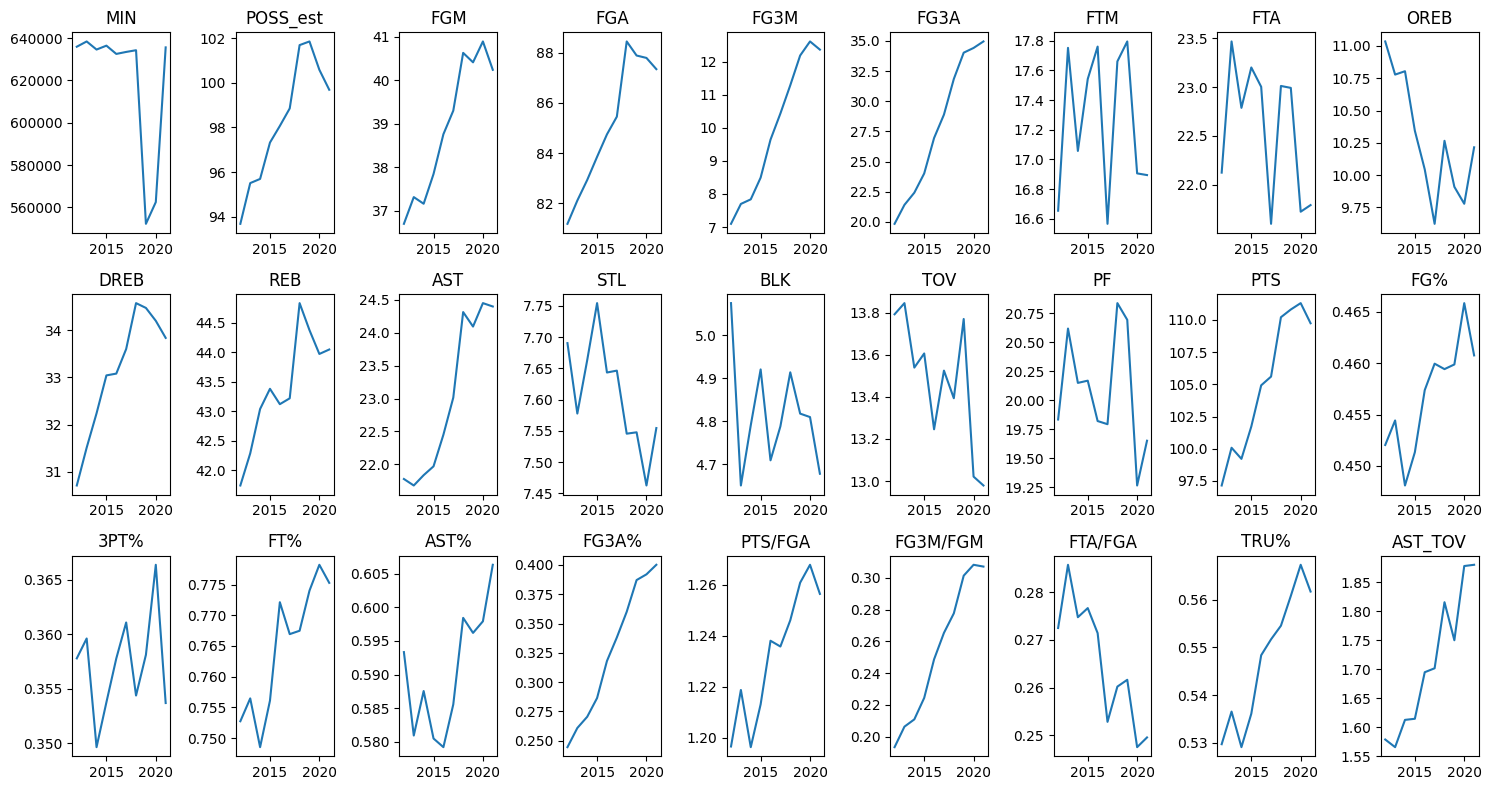

In [104]:
fig,ax = plt.subplots(3,9,figsize = (15,8))
xidx, yidx = 0,0
for col in change_per48_df.columns[1:]:
    ax[xidx,yidx].plot(change_per48_df['season_start_year'],change_per48_df[col])
    ax[xidx,yidx].set_title(col)
    yidx+=1
    if yidx>=9:
        yidx=0
        xidx +=1
plt.tight_layout()
plt.show()

In [105]:
change_per100_df = change_df.copy()
totals = change_per100_df.columns[3:18]
for col in totals:
    change_per100_df[col] = (change_per100_df[col]/change_per100_df['POSS_est'])*100

change_per100_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,635884,248201.92,39.175765,86.665325,7.577701,21.179933,17.777864,23.617061,11.779522,32.780568,44.560090,23.244784,8.209445,5.416558,14.722690,21.171472,103.707095,0.452035,0.357777,0.752755,0.593346,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,638373,254032.80,39.070152,85.977480,8.061951,22.419152,18.587757,24.571630,11.285551,32.992590,44.278140,22.696675,7.934408,4.869056,14.496553,21.587370,104.790011,0.454423,0.359601,0.756472,0.580921,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,634546,253004.12,38.833755,86.664597,8.191171,23.428867,17.825006,23.813051,11.290725,33.687594,44.978319,22.816624,8.008170,5.005847,14.148386,21.055784,103.683687,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,636391,258064.80,38.885970,86.158205,8.728040,24.673260,18.024930,23.838974,10.627563,33.949225,44.576788,22.572238,7.967766,5.055319,13.980210,20.722702,104.524910,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,632482,258443.80,39.523873,86.414532,9.831151,27.479088,18.110707,23.455776,10.242072,33.729964,43.972036,22.891631,7.793958,4.801431,13.506998,20.210197,106.989605,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,633425,260904.52,39.757456,86.438901,10.551753,29.223334,16.757471,21.850139,9.734212,33.988679,43.722891,23.280164,7.735014,4.843151,13.681250,20.021884,106.824136,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,634231,268739.84,39.954627,86.967753,11.095117,31.310207,17.366610,22.628204,10.094521,33.995704,44.090225,23.910485,7.419815,4.831438,13.170358,20.489333,108.370981,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,552262,234384.64,39.677088,86.278265,11.959828,33.397666,17.470855,22.572298,9.728453,33.840955,43.569408,23.655560,7.410042,4.729405,13.518377,20.314898,108.784859,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,562518,235759.48,40.655417,87.272843,12.533536,34.209865,16.806959,21.597011,9.720924,33.996936,43.717860,24.309097,7.419002,4.781144,12.945397,19.151722,110.651330,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,635572,264004.96,40.366287,87.609339,12.398631,35.056917,16.946651,21.859059,10.246777,33.939514,44.186291,24.476055,7.577888,4.691957,13.019452,19.710993,110.077856,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


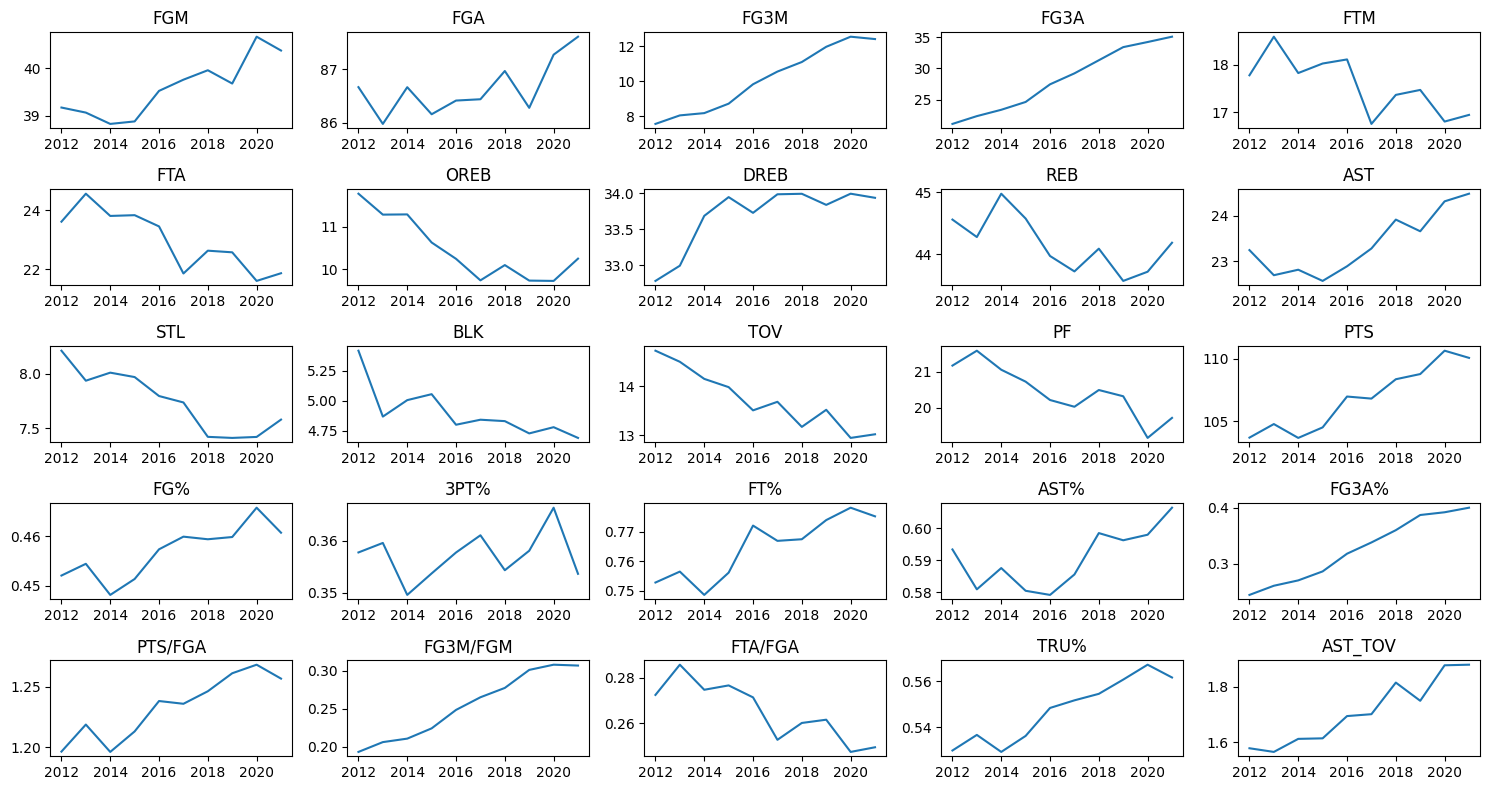

In [106]:
fig,ax = plt.subplots(5,5,figsize = (15,8))
xidx, yidx = 0,0
for col in change_per100_df.columns[3:]:
    ax[xidx,yidx].plot(change_per100_df['season_start_year'],change_per100_df[col])
    ax[xidx,yidx].set_title(col)
    yidx+=1
    if yidx>=5:
        yidx=0
        xidx +=1
plt.tight_layout()
plt.show()

In [108]:
change_rs_df = rs_df.groupby('season_start_year')[total_cols].sum().reset_index()
change_playoff_df = playoff_df.groupby('season_start_year')[total_cols].sum().reset_index()

In [116]:
change_rs_df = rs_df.groupby('season_start_year')[total_cols].sum().reset_index()
change_playoff_df = playoff_df.groupby('season_start_year')[total_cols].sum().reset_index()

for i in [change_rs_df,change_playoff_df]:
    i['POSS_est'] = i['FGA']-i['OREB']+i['TOV']+0.44*i['FTA']
    i['POSS_per_48'] = (i['POSS_est']/i['MIN'])*48*5
    
    i['FG%'] = i['FGM']/i['FGA']
    i['3PT%'] = i['FG3M']/i['FG3A']
    i['FT%'] = i['FTM']/i['FTA']
    i['AST%'] = i['AST']/i['FGM']
    i['FG3A%'] = i['FG3A']/i['FGA']
    i['PTS/FGA'] = i['PTS']/i['FGA']
    i['FG3M/FGM'] = i['FG3M']/i['FGM']
    i['FTA/FGA'] = i['FTA']/i['FGA']
    i['TRU%'] = 0.5*i['PTS']/(i['FGA']+0.475*i['FTA'])
    i['AST_TOV'] = i['AST']/i['TOV']
    for col in total_cols:
        i[col] = 100*i[col]/i['POSS_est']
    i.drop(columns=['MIN','POSS_est'], inplace=True)
    
change_rs_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,39.270953,86.735365,7.573088,21.109396,17.662937,23.460955,11.812003,32.747162,44.559165,23.410189,8.250677,5.430183,14.753819,20.983773,103.777931,93.838988,0.452767,0.358754,0.752865,0.596120,0.243377,1.196489,0.192842,0.270489,0.530132,1.586721
1,2013,39.077222,85.994401,8.025279,22.311911,18.477433,24.441006,11.307161,32.985187,44.292348,22.799223,7.958311,4.883231,14.558717,21.448058,104.657155,95.735469,0.454416,0.359686,0.756001,0.583440,0.259458,1.217023,0.205370,0.284216,0.536132,1.566019
2,2014,38.900086,86.650240,8.135183,23.240912,17.771371,23.688136,11.288515,33.604208,44.892723,22.846798,8.021797,4.972578,14.215495,20.960953,103.706727,95.659492,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
3,2015,38.926558,86.096120,8.670900,24.515476,17.996886,23.782176,10.603882,33.942436,44.546317,22.690502,7.988086,5.045782,14.043605,20.630890,104.520902,97.493488,0.452129,0.353691,0.756738,0.582905,0.284745,1.214002,0.222750,0.276228,0.536595,1.615718
4,2016,39.516445,86.434227,9.769173,27.323490,18.052073,23.388341,10.257879,33.777035,44.034914,22.896756,7.795428,4.800256,13.532781,20.136476,106.854135,98.151085,0.457185,0.357538,0.771841,0.579423,0.316119,1.236248,0.247218,0.270591,0.547724,1.691948
5,2017,39.782703,86.439951,10.536996,29.127708,16.700692,21.772593,9.754285,33.953813,43.708098,23.339648,7.750757,4.836313,13.734393,19.940143,106.803093,98.979263,0.460235,0.361752,0.767051,0.586678,0.336970,1.235576,0.264864,0.251881,0.551772,1.699358
6,2018,40.060963,86.993122,11.081358,31.213318,17.241016,22.498864,10.089962,33.952838,44.042800,23.975453,7.443993,4.830132,13.197341,20.384863,108.444300,101.847754,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
7,2019,39.741774,86.378550,11.875237,33.176460,17.368831,22.473502,9.798838,33.803237,43.602075,23.716035,7.438668,4.765339,13.531948,20.205627,108.727615,102.071250,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
8,2020,40.637565,87.183600,12.520406,34.156188,16.730698,21.517093,9.692393,33.988197,43.680589,24.457861,7.466502,4.804198,13.041271,19.021868,110.526234,100.810750,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
9,2021,40.444286,87.713064,12.383811,35.022979,16.859678,21.766578,10.288949,33.966643,44.255592,24.540976,7.597520,4.692395,12.998590,19.550702,110.132061,99.871250,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972


In [118]:
change_playoff_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,37.771884,85.632344,7.645745,22.220248,19.472856,25.919393,11.300475,33.273267,44.573742,20.805310,7.601330,5.215604,14.263597,23.939748,102.662369,91.369052,0.441094,0.344089,0.751285,0.550815,0.259484,1.198874,0.202419,0.302682,0.524087,1.458630
1,2013,38.969078,85.735583,8.586203,23.952254,20.164932,26.439002,10.976611,33.098427,44.075038,21.230681,7.592708,4.666415,13.607867,23.578941,106.689290,92.328869,0.454526,0.358472,0.762696,0.544808,0.279374,1.244399,0.220334,0.308378,0.542704,1.560177
2,2014,37.835437,86.880670,9.033813,26.257692,18.632240,25.693079,11.323987,34.942587,46.266574,22.362494,7.803083,5.506566,13.138362,22.483030,103.336928,96.184277,0.435487,0.344044,0.725185,0.591046,0.302227,1.189412,0.238766,0.295728,0.521457,1.702076
3,2015,38.288552,87.072040,9.569092,26.995683,18.437710,24.674980,10.976133,34.049157,45.025290,20.831506,7.668674,5.195694,13.047101,22.074087,104.583906,94.882501,0.439734,0.354468,0.747223,0.544066,0.310038,1.201119,0.249920,0.283386,0.529310,1.596639
4,2016,39.641494,86.102680,10.812501,29.942811,19.039120,24.523533,9.991793,32.984641,42.976434,22.810469,7.770671,4.820030,13.098759,21.377487,109.134609,96.777874,0.460398,0.361105,0.776361,0.575419,0.347757,1.267494,0.272757,0.284817,0.558226,1.741422
5,2017,39.370670,86.422811,10.777830,30.688355,17.627351,23.038160,9.426692,34.522835,43.949527,22.368846,7.493814,4.947919,12.867091,21.274173,107.146521,96.985966,0.455559,0.351203,0.765137,0.568160,0.355096,1.239794,0.273753,0.266575,0.550226,1.738454
6,2018,38.325808,86.579167,11.305871,32.794311,19.290414,24.609395,10.164354,34.652311,44.816665,22.915336,7.049471,4.851445,12.757054,22.089558,107.247901,99.397395,0.442668,0.344751,0.783864,0.597909,0.378778,1.238726,0.294994,0.284242,0.545687,1.796287
7,2019,38.828648,84.962888,13.069360,36.299094,18.809038,23.868145,8.805256,34.335679,43.140935,22.862347,7.034568,4.258082,13.340384,21.748138,109.535694,99.141484,0.457007,0.360046,0.788039,0.588801,0.427235,1.289218,0.336591,0.280924,0.568720,1.713770
8,2020,40.889571,88.443382,12.705765,34.913910,17.807232,22.645242,10.095156,34.111566,44.206722,22.357836,6.795968,4.478752,11.687867,20.854939,112.292139,97.748115,0.462325,0.363917,0.786356,0.546786,0.394760,1.269650,0.310734,0.256042,0.565989,1.912910
9,2021,39.227573,86.095040,12.614982,35.552389,18.216389,23.209204,9.631111,33.543445,43.174556,23.528272,7.291283,4.685565,13.324021,22.051108,109.286518,97.140594,0.455631,0.354828,0.784878,0.599789,0.412944,1.269371,0.321585,0.269577,0.562640,1.765854


In [123]:
percent_change_in_playoffs = round(100*(change_playoff_df-change_rs_df)/change_playoff_df,2)
percent_change_in_playoffs['season_start_year'] = change_rs_df['season_start_year']
percent_change_in_playoffs

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,-3.97,-1.29,0.95,5.00,9.29,9.48,-4.53,1.58,0.03,-12.52,-8.54,-4.11,-3.44,12.35,-1.09,-2.70,-2.65,-4.26,-0.21,-8.23,6.21,0.20,4.73,10.64,-1.15,-8.78
1,2013,-0.28,-0.30,6.53,6.85,8.37,7.56,-3.01,0.34,-0.49,-7.39,-4.82,-4.65,-6.99,9.04,1.90,-3.69,0.02,-0.34,0.88,-7.09,7.13,2.20,6.79,7.84,1.21,-0.37
2,2014,-2.81,0.27,9.95,11.49,4.62,7.80,0.31,3.83,2.97,-2.17,-2.80,9.70,-8.20,6.77,-0.36,0.55,-3.09,-1.74,-3.45,0.63,11.25,-0.62,12.41,7.56,-1.57,5.58
3,2015,-1.67,1.12,9.39,9.19,2.39,3.62,3.39,0.31,1.06,-8.92,-4.17,2.89,-7.64,6.54,0.06,-2.75,-2.82,0.22,-1.27,-7.14,8.16,-1.07,10.87,2.53,-1.38,-1.19
4,2016,0.32,-0.39,9.65,8.75,5.18,4.63,-2.66,-2.40,-2.46,-0.38,-0.32,0.41,-3.31,5.81,2.09,-1.42,0.70,0.99,0.58,-0.70,9.10,2.47,9.36,4.99,1.88,2.84
5,2017,-1.05,-0.02,2.23,5.09,5.26,5.49,-3.48,1.65,0.55,-4.34,-3.43,2.26,-6.74,6.27,0.32,-2.06,-1.03,-3.00,-0.25,-3.26,5.10,0.34,3.25,5.51,-0.28,2.25
6,2018,-4.53,-0.48,1.99,4.82,10.62,8.58,0.73,2.02,1.73,-4.63,-5.60,0.44,-3.45,7.72,-1.12,-2.47,-4.03,-2.98,2.24,-0.09,5.27,-0.63,6.23,9.01,-1.72,-1.14
7,2019,-2.35,-1.67,9.14,8.60,7.66,5.84,-11.28,1.55,-1.07,-3.73,-5.74,-11.91,-1.44,7.09,0.74,-2.96,-0.67,0.58,1.93,-1.35,10.10,2.36,11.22,7.39,1.51,-2.27
8,2020,0.62,1.42,1.46,2.17,6.05,4.98,3.99,0.36,1.19,-9.39,-9.87,-7.27,-11.58,8.79,1.57,-3.13,-0.82,-0.73,1.12,-10.07,0.76,0.15,0.85,3.61,-0.24,1.96
9,2021,-3.10,-1.88,1.83,1.49,7.45,6.22,-6.83,-1.26,-2.50,-4.30,-4.20,-0.15,2.44,11.34,-0.77,-2.81,-1.20,0.35,1.31,-1.17,3.31,1.09,4.79,7.95,0.18,-6.92


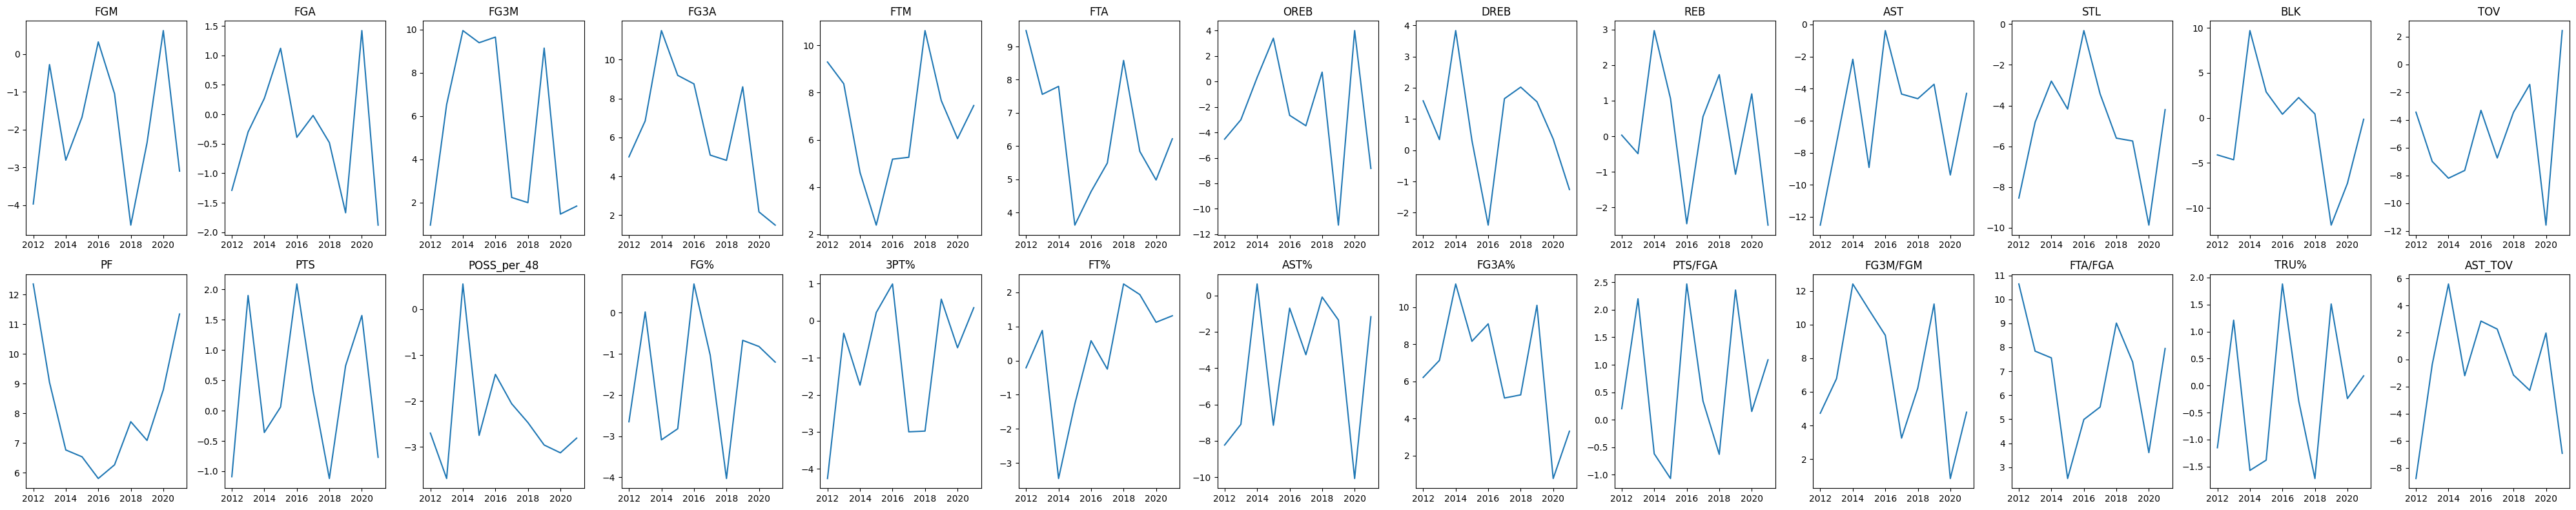

In [125]:
fig,ax = plt.subplots(2,13,figsize = (80,40))
xidx, yidx = 0,0
for col in percent_change_in_playoffs.columns[1:]:
    ax[xidx,yidx].plot(percent_change_in_playoffs['season_start_year'],percent_change_in_playoffs[col])
    ax[xidx,yidx].set_title(col)
    yidx+=1
    if yidx>=13:
        yidx=0
        xidx +=1
plt.tight_layout()
plt.show()